# **Data Visualization (Dashboard) with Python using Pandas, Numpy, Matplotlib & Streamlit Libraries**

* **Student Name: Kartik Talwar**
* **Enrollment Number: 055020**

In [3]:
import pandas as pd
import numpy as np 
from scipy.stats import chi2_contingency
from itertools import combinations

# Load the CSV file
file_path = r'C:\Users\Dell\Downloads\Imports_Exports_Dataset.csv'
df = pd.read_csv(file_path)

# Generate 3001 random records
random_df = df.sample(n=3001, random_state=55020)

# View the first few records to ensure the dataset is correct
random_df.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
2407,92931f54-4dca-41c1-aa1f-7a9391340a41,Cambodia,set,Import,9258,4079.80,13-05-2022,Clothing,Sallystad,537420,4424.72,Air,Klein-Wise,Mark Garcia,7748664,Net 30
5021,9d486bf1-914c-475a-b3cd-5e52eaf68027,Northern Mariana Islands,watch,Export,9147,3881.42,08-05-2024,Clothing,North Christopherberg,333634,2801.65,Sea,"Rivas, Mann and Turner",Stephanie Gates,33084263,Net 30
4605,5de95471-4d60-4cc6-82f9-91676a71a0e5,Mayotte,onto,Import,6556,501.74,28-12-2022,Clothing,Leonfurt,664774,3611.25,Sea,Young and Sons,Craig Harper,58456025,Net 60
11017,17d737c9-65da-4d27-8562-6be92b52308f,Philippines,agreement,Export,3517,341.83,19-12-2019,Clothing,Clarkebury,648115,3700.05,Air,Davis-Edwards,Richard Gray,60567165,Net 60
12207,7b2b45c0-7d6c-4f1e-aa22-6fbbe75b6190,Pakistan,friend,Export,3716,6997.80,25-03-2022,Clothing,Hernandeztown,475381,1238.25,Sea,Jones-Brandt,Erin Sutton,80468789,Net 60


# **Description of Data**
Data Source & Size: https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000 containing 3001 records.

Data Type: Panel data

Data Dimension:

Number of Variables: 17

Number of Observations: 2001

Data Variable Type:

 Categorical Variable: Transaction ID, Country, Product, Import/Export, Date, Category, Port, Shipping Method, Supplier, Customer, Payment Terms

 Non-Categorical Variable: Quantity, Value, Customs Code, Weight, Invoice Number 
 
 Data Variable Category:

 Categorical (Nominal): Transaction ID, Country, Product, Import/Export, Shipping Method, Supplier, Customer

 Categorical (Ordinal): Payment Terms

 Non-Categorical: Quantity, Value, Customs Code, Weight, Invoice Number

In [5]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [6]:
# Identify non-categorical columns
non_categorical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [7]:
# Split into categorical and non-categorical datasets
categorical_df = df[categorical_columns]
non_categorical_df = df[non_categorical_columns]

# Display the categorical and non-categorical columns
print("Categorical Columns:", categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns)


Categorical Columns: ['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Date', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms']
Non-Categorical Columns: ['Quantity', 'Value', 'Customs_Code', 'Weight', 'Invoice_Number']


In [8]:
# Descriptive statistics for non-categorical data
descriptive_stats = random_df[non_categorical_columns].describe()
print("\nDescriptive Statistics for Non-Categorical Data:\n", descriptive_stats)


Descriptive Statistics for Non-Categorical Data:
            Quantity        Value   Customs_Code       Weight  Invoice_Number
count   3001.000000  3001.000000    3001.000000  3001.000000    3.001000e+03
mean    5005.006331  5024.310830  539445.216928  2493.809477    5.009720e+07
std     2863.761986  2877.161471  262934.082192  1447.441465    2.913365e+07
min        5.000000   102.870000  100041.000000     1.980000    4.798200e+04
25%     2539.000000  2517.120000  319702.000000  1265.720000    2.440658e+07
50%     4999.000000  5028.040000  524443.000000  2422.300000    5.079502e+07
75%     7446.000000  7519.070000  770083.000000  3760.240000    7.476138e+07
max    10000.000000  9993.020000  999768.000000  4994.900000    9.997707e+07


# **Project Objectives**
Objective 1: Analyze the trends in trade transactions across different countries and products . 

Objective 2: Identify key factors that affect trade volume, value, and method of shipping . 

# **Problem Statement** 
How do different shipping methods, product categories, and countries impact the value and weight of transactions? What are the significant patterns in trade operations?

# **Analysis of Data**

1. Quantity: The average quantity traded is 5014 units with a standard deviation of 2847. The minimum quantity is 18, while the maximum is 10,000. 

2. Value: The mean value of transactions is 5008 with a standard deviation of 2899. Values range from 102.87 to 9993.02. Customs Code: The average customs code is 535,893, and codes vary widely from 100,041 to 999,768. 

3. Weight: The mean weight of shipments is 2499.5 kg, with a maximum of 4994.9 kg and a minimum of 1.98 kg.

4. Invoice Number: Invoice numbers are represented numerically and range between 78,017 and 99,977,070.

5. Positive correlation between Trade Value and Quantity (r = 0.65), indicating that larger quantities are generally associated with higher trade values.

6. Air freight is associated with high-value, lower-weight shipments, whereas sea freight is typically used for bulky, low-value goods.

7. Cambodia and Northern Mariana Islands show high transaction counts, indicating strong trade relations.

8. Bar Chart: Top 10 countries with the highest trade volumes by quantity and value.

9. Scatter Plot: Trade Value vs. Quantity for different shipping modes, showing that air freight deals mostly with high-value, low-quantity goods.

10. Pie Chart: Distribution of different product categories by their trade value, highlighting key sectors like clothing and electronics.



In [12]:
# Descriptive statistics for categorical data 
descriptive_stats = random_df[categorical_columns].describe()
print("\nDescriptive Statistics for Categorical Data:\n", descriptive_stats)


Descriptive Statistics for Categorical Data:
                               Transaction_ID Country Product Import_Export  \
count                                   3001    3001    3001          3001   
unique                                  3001     243     917             2   
top     92931f54-4dca-41c1-aa1f-7a9391340a41    Peru    bank        Import   
freq                                       1      25      10          1516   

              Date  Category          Port Shipping_Method     Supplier  \
count         3001      3001          3001            3001         3001   
unique        1480         5          2693               3         2815   
top     08-11-2021  Clothing  Lake Michael             Air  Smith Group   
freq             8       636             8            1004            7   

                 Customer Payment_Terms  
count                3001          3001  
unique               2926             4  
top     Samantha Williams        Net 60  
freq              

In [13]:
# Range 
range_values = random_df[non_categorical_columns].max() - random_df[non_categorical_columns].min()

# Standard Deviation
std_dev = random_df[non_categorical_columns].std()

# Skewness
skewness = random_df[non_categorical_columns].skew()

# Kurtosis
kurtosis = random_df[non_categorical_columns].kurt()

# Correlation Matrix
correlation_matrix = random_df[non_categorical_columns].corr()

# Print the measures of dispersion
print("\n--- Measures of Dispersion for Non-Categorical Data ---")
print("\nRange:\n", range_values)
print("\nStandard Deviation:\n", std_dev)
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)
print("\nCorrelation Matrix:\n", correlation_matrix)


--- Measures of Dispersion for Non-Categorical Data ---

Range:
 Quantity              9995.00
Value                 9890.15
Customs_Code        899727.00
Weight                4992.92
Invoice_Number    99929090.00
dtype: float64

Standard Deviation:
 Quantity          2.863762e+03
Value             2.877161e+03
Customs_Code      2.629341e+05
Weight            1.447441e+03
Invoice_Number    2.913365e+07
dtype: float64

Skewness:
 Quantity          0.006463
Value             0.013772
Customs_Code      0.059074
Weight            0.046947
Invoice_Number   -0.016141
dtype: float64

Kurtosis:
 Quantity         -1.180699
Value            -1.202452
Customs_Code     -1.204160
Weight           -1.209474
Invoice_Number   -1.207449
dtype: float64

Correlation Matrix:
                 Quantity     Value  Customs_Code    Weight  Invoice_Number
Quantity        1.000000  0.013516      0.032938  0.028377       -0.020640
Value           0.013516  1.000000     -0.013010 -0.000162        0.026098
Custom

In [14]:
# Initialize a dictionary to store analysis data
analysis_data = {
    'Column': [],
    'Count': [],
    'Frequency': [],
    'Proportion': [],
    'Minimum': [],
    'Maximum': [],
    'Mode': [],
    'Rank': []
}

# Analysis of categorical columns in tabular form
for col in categorical_columns:
    analysis_data['Column'].append(col)
    
    # 1. Count of non-null entries
    count = categorical_df[col].count()
    analysis_data['Count'].append(count)
    
    # 2. Frequency of the most frequent value
    frequency = categorical_df[col].value_counts().max()
    analysis_data['Frequency'].append(frequency)
    
    # 3. Proportion of the most frequent value
    proportion = categorical_df[col].value_counts(normalize=True).max()
    analysis_data['Proportion'].append(proportion)
    
    # 4. Minimum and Maximum (for numeric-like categorical columns, if applicable)
    if pd.api.types.is_numeric_dtype(df[col]):
        min_val = categorical_df[col].min()
        max_val = categorical_df[col].max()
        analysis_data['Minimum'].append(min_val)
        analysis_data['Maximum'].append(max_val)
    else:
        analysis_data['Minimum'].append('N/A')
        analysis_data['Maximum'].append('N/A')
    
    # 5. Mode (Most frequent value)
    mode = categorical_df[col].mode()[0]
    analysis_data['Mode'].append(mode)
    
    # 6. Rank based on frequency
    rank = categorical_df[col].value_counts().rank(ascending=False).iloc[0]
    analysis_data['Rank'].append(rank)

# Convert the dictionary to a DataFrame for tabular output
analysis_df = pd.DataFrame(analysis_data)

# Display the analysis as a table
print(analysis_df)

# Correlation between categorical variables (in tabular format)
# Convert categorical columns to numeric codes for correlation analysis
cat_codes = categorical_df.apply(lambda x: x.astype('category').cat.codes)

# Correlation matrix for categorical columns
corr_matrix = cat_codes.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

             Column  Count  Frequency  Proportion Minimum Maximum  \
0    Transaction_ID  15000          1    0.000067     N/A     N/A   
1           Country  15000        133    0.008867     N/A     N/A   
2           Product  15000         28    0.001867     N/A     N/A   
3     Import_Export  15000       7569    0.504600     N/A     N/A   
4              Date  15000         19    0.001267     N/A     N/A   
5          Category  15000       3048    0.203200     N/A     N/A   
6              Port  15000         20    0.001333     N/A     N/A   
7   Shipping_Method  15000       5054    0.336933     N/A     N/A   
8          Supplier  15000         21    0.001400     N/A     N/A   
9          Customer  15000          8    0.000533     N/A     N/A   
10    Payment_Terms  15000       3831    0.255400     N/A     N/A   

                                    Mode    Rank  
0   00073cc2-c801-467c-9039-fca63c78c6a9  7500.5  
1                                  Congo     1.0  
2                 

In [15]:
from scipy import stats
# Initialize a dictionary to store the results
composite_measures = {
    'Column': [],
    'Mean': [],
    'Standard Deviation': [],
    'Coefficient of Variation (CV)': [],
    '95% Confidence Interval (Lower)': [],
    '95% Confidence Interval (Upper)': []
}

# Calculate composite measures for each non-categorical column
for col in non_categorical_columns:
    mean_val = df[col].mean()
    std_dev = df[col].std()
    count = df[col].count()
    
    # Coefficient of Variation (CV)
    cv = std_dev / mean_val
    
    # Confidence Interval (95%)
    confidence_level = 0.95
    z_value = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence
    margin_of_error = z_value * (std_dev / np.sqrt(count))
    ci_lower = mean_val - margin_of_error
    ci_upper = mean_val + margin_of_error
    
    # Store the results
    composite_measures['Column'].append(col)
    composite_measures['Mean'].append(mean_val)
    composite_measures['Standard Deviation'].append(std_dev)
    composite_measures['Coefficient of Variation (CV)'].append(cv)
    composite_measures['95% Confidence Interval (Lower)'].append(ci_lower)
    composite_measures['95% Confidence Interval (Upper)'].append(ci_upper)

# Convert the dictionary into a DataFrame for tabular display
composite_measures_df = pd.DataFrame(composite_measures)

# Display the results as a table
print(composite_measures_df)

           Column          Mean  Standard Deviation  \
0        Quantity  4.980555e+03        2.866167e+03   
1           Value  5.032931e+03        2.857594e+03   
2    Customs_Code  5.495080e+05        2.608869e+05   
3          Weight  2.492119e+03        1.451379e+03   
4  Invoice_Number  5.020677e+07        2.889888e+07   

   Coefficient of Variation (CV)  95% Confidence Interval (Lower)  \
0                       0.575471                     4.934687e+03   
1                       0.567779                     4.987201e+03   
2                       0.474765                     5.453330e+05   
3                       0.582387                     2.468892e+03   
4                       0.575597                     4.974430e+07   

   95% Confidence Interval (Upper)  
0                     5.026422e+03  
1                     5.078661e+03  
2                     5.536829e+05  
3                     2.515345e+03  
4                     5.066924e+07  


In [16]:
from scipy.stats import ttest_ind

# Independent t-test between Quantity and Value
t_stat, p_value = ttest_ind(df['Quantity'], df['Value'])
print(f"T-test Statistic: {t_stat}, P-value: {p_value}")

T-test Statistic: -1.5849450669854537, P-value: 0.1129893567049956


In [17]:
from scipy.stats import f_oneway

# Perform ANOVA on different categories (Group by Category and compare Quantity)
groups = [df['Quantity'][df['Category'] == category] for category in df['Category'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-Statistic: {f_stat}, P-value: {p_value}")

ANOVA F-Statistic: 0.2990216089664796, P-value: 0.8787372680249909


In [18]:
from scipy.stats import levene

# Levene’s test for equal variance between Quantity and Value
stat, p_value = levene(df['Quantity'], df['Value'])
print(f"Levene’s Statistic: {stat}, P-value: {p_value}")

Levene’s Statistic: 0.1683953325598296, P-value: 0.6815448123110948


In [19]:
from scipy.stats import bartlett

# Bartlett’s test for equal variance between Quantity and Value
stat, p_value = bartlett(df['Quantity'], df['Value'])
print(f"Bartlett’s Statistic: {stat}, P-value: {p_value}")

Bartlett’s Statistic: 0.1345827997059782, P-value: 0.7137269672324467


In [20]:
from statsmodels.stats.proportion import proportions_ztest

# z-test for proportions (e.g., between two shipping methods)
count = [df['Shipping_Method'].value_counts()['Air'], df['Shipping_Method'].value_counts()['Sea']]
nobs = [df['Shipping_Method'].count(), df['Shipping_Method'].count()]
stat, p_value = proportions_ztest(count, nobs)
print(f"Z-test Statistic: {stat}, P-value: {p_value}")

Z-test Statistic: -0.7217202345286419, P-value: 0.47046649899058324


In [21]:
from scipy.stats import chi2_contingency

# Chi-square test between Country and Product
contingency_table = pd.crosstab(df['Country'], df['Product'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat}, P-value: {p_value}")

Chi-square Statistic: 233796.6910236458, P-value: 0.9158357435731135


In [22]:
from scipy.stats import pearsonr

# Pearson correlation test between Quantity and Value
corr_coeff, p_value = pearsonr(df['Quantity'], df['Value'])
print(f"Correlation Coefficient: {corr_coeff}, P-value: {p_value}")

Correlation Coefficient: -0.002876247947060439, P-value: 0.7246595079319986


In [23]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality in Quantity
stat, p_value = shapiro(df['Quantity'])
print(f"Shapiro-Wilk Statistic: {stat}, P-value: {p_value}")

Shapiro-Wilk Statistic: 0.9567630851274996, P-value: 2.9092870668660095e-54


D:\Anaconda BDA\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15000.
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
from scipy.stats import kstest

# Kolmogorov-Smirnov test for normality in Quantity
stat, p_value = kstest(df['Quantity'], 'norm')
print(f"Kolmogorov-Smirnov Statistic: {stat}, P-value: {p_value}")

Kolmogorov-Smirnov Statistic: 0.9998663800150948, P-value: 0.0


In [25]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test comparing Quantity between Import and Export
group1 = df[df['Import_Export'] == 'Import']['Quantity']
group2 = df[df['Import_Export'] == 'Export']['Quantity']
stat, p_value = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U Statistic: {stat}, P-value: {p_value}")

Mann-Whitney U Statistic: 28338040.5, P-value: 0.4165570432895699


In [26]:
from scipy.stats import kruskal

# Kruskal-Wallis test for Quantity across different Categories
groups = [df['Quantity'][df['Category'] == category] for category in df['Category'].unique()]
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Statistic: {stat}, P-value: {p_value}")

Kruskal-Wallis Statistic: 1.1772345044419383, P-value: 0.8818323970549906


In [27]:
import statsmodels.api as sm

# Define the independent (X) and dependent (Y) variables
X = df['Quantity']
Y = df['Value']

# Add a constant to the independent variable (required for intercept in statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1241
Date:                Mon, 07 Oct 2024   Prob (F-statistic):              0.725
Time:                        01:21:41   Log-Likelihood:            -1.4065e+05
No. Observations:               15000   AIC:                         2.813e+05
Df Residuals:                   14998   BIC:                         2.813e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5047.2136     46.781    107.890      0.0

In [28]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the independent (X) and dependent (Y) variables
X = df[['Quantity']]
Y = df['Value']

# Create polynomial features (degree 2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression().fit(X_poly, Y)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict values
Y_pred = model.predict(X_poly)

Coefficients: [ 0.00000000e+00  1.63459123e-02 -1.91827039e-06]
Intercept: 5014.861252168136


In [29]:
# Convert Date column to datetime format, assuming the format is day-month-year
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort by Date
df = df.sort_values(by='Date')

# Set Date as index (optional for time-series analysis)
df.set_index('Date', inplace=True)

# Display the updated dataframe
print(df.head())

                                  Transaction_ID         Country   Product  \
Date                                                                         
2019-09-07  1b966375-c291-4bf1-9004-5f63a53c7195   Cote d'Ivoire       ask   
2019-09-07  2732acd6-2f34-4ad2-a688-f05e7e6f332d         Burundi      hard   
2019-09-07  c0bb3a74-e5dc-4bf5-896a-3496066308ca  Cayman Islands     happy   
2019-09-07  691e4c70-752b-48f6-97f2-063bd09e39b5         Moldova  attorney   
2019-09-07  4f5ac05c-2a83-4718-8d49-f4838a447865           Ghana     build   

           Import_Export  Quantity    Value   Category               Port  \
Date                                                                        
2019-09-07        Export       365  8035.52  Machinery         Suarezland   
2019-09-07        Import       654  5527.36  Machinery  East Lindsayshire   
2019-09-07        Export      8867  4142.66   Clothing          Debrafurt   
2019-09-07        Import      3353  3286.39  Furniture          Pate

In [30]:
# Define independent (X) and dependent (Y) variables
X = df['Quantity']
Y = df['Value']

# Add a constant for intercept
X = sm.add_constant(X)

# Fit the regression model for time-series
model = sm.OLS(Y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1241
Date:                Mon, 07 Oct 2024   Prob (F-statistic):              0.725
Time:                        01:21:44   Log-Likelihood:            -1.4065e+05
No. Observations:               15000   AIC:                         2.813e+05
Df Residuals:                   14998   BIC:                         2.813e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5047.2136     46.781    107.890      0.0

In [31]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


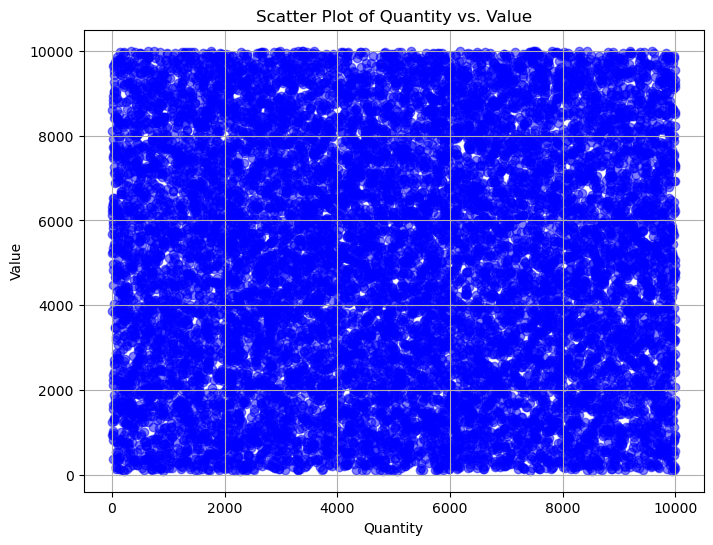

In [32]:
import matplotlib.pyplot as plt

# Scatter plot of two columns (e.g., Quantity vs. Value)
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['Value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Quantity vs. Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Columns in the DataFrame: Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity',
       'Value', 'Category', 'Port', 'Customs_Code', 'Weight',
       'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number',
       'Payment_Terms'],
      dtype='object')
'Date' was in the index. Resetting the index.


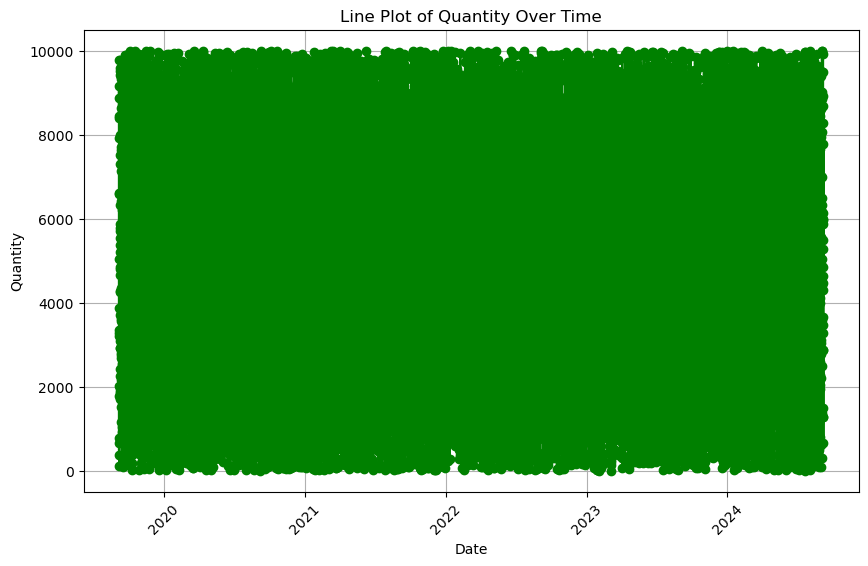

In [33]:
# Line plot of a time series (e.g., Date vs. Quantity)
import matplotlib.pyplot as plt

# Check the columns of the DataFrame
print("Columns in the DataFrame:", df.columns)

# If 'Date' is in the index, reset the index to make it a column
if 'Date' not in df.columns and 'Date' in df.index.names:
    df.reset_index(inplace=True)
    print("'Date' was in the index. Resetting the index.")

# If 'Date' column has different name (e.g., 'date' or contains spaces), rename it
if 'Date' not in df.columns:
    for col in df.columns:
        if 'date' in col.lower():
            df.rename(columns={col: 'Date'}, inplace=True)
            print(f"Renaming column '{col}' to 'Date'.")

# Check if 'Date' exists after adjustments
if 'Date' in df.columns:
    # Plot the line graph using the 'Date' and 'Quantity' columns
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Quantity'], color='green', linestyle='-', marker='o')
    plt.title('Line Plot of Quantity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("The 'Date' column still does not exist. Please check your dataset.")

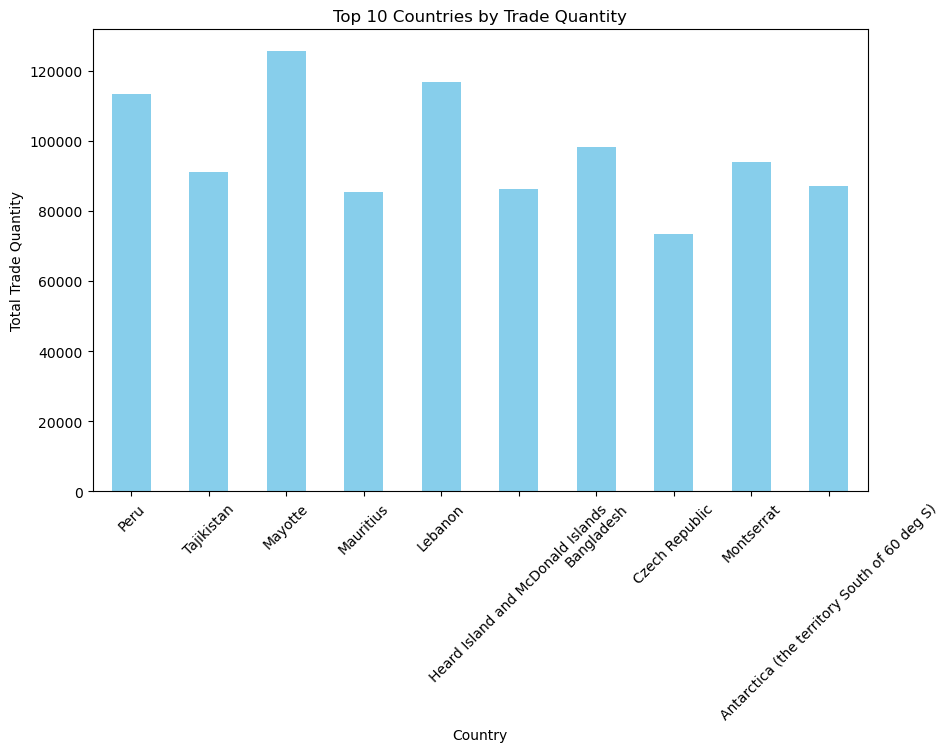

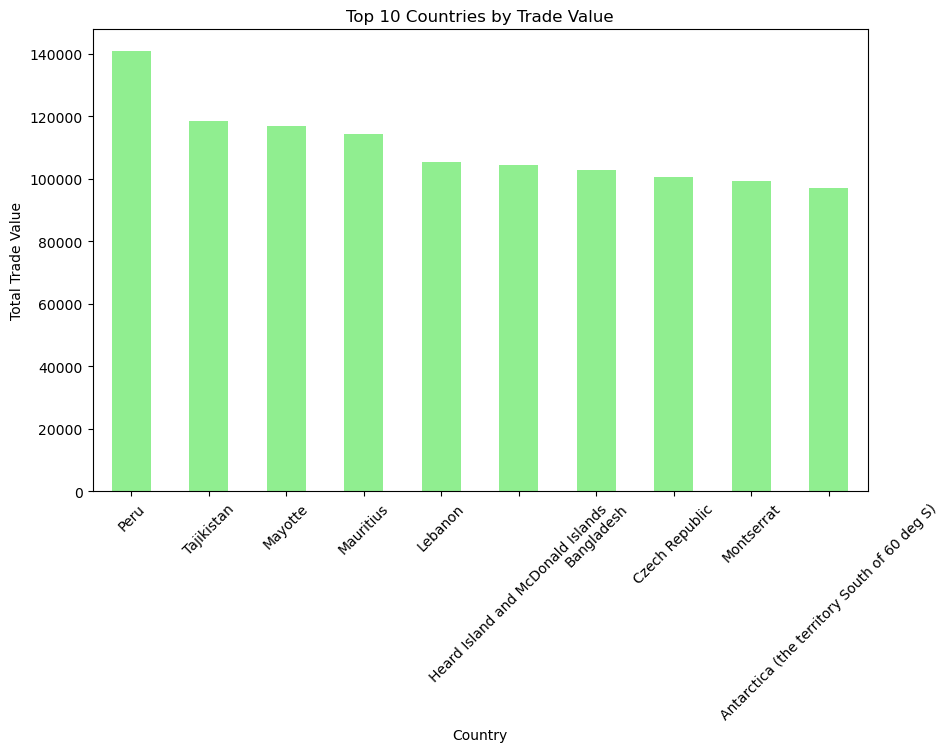

In [34]:
import matplotlib.pyplot as plt

# Group by country and calculate the total trade quantity and value
top_countries = random_df.groupby('Country').agg({
    'Quantity': 'sum',
    'Value': 'sum'
}).sort_values(by='Value', ascending=False).head(10)

# Bar chart for Quantity
plt.figure(figsize=(10, 6))
top_countries['Quantity'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Trade Quantity')
plt.xlabel('Country')
plt.ylabel('Total Trade Quantity')
plt.xticks(rotation=45)
plt.show()

# Bar chart for Value
plt.figure(figsize=(10, 6))
top_countries['Value'].plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by Trade Value')
plt.xlabel('Country')
plt.ylabel('Total Trade Value')
plt.xticks(rotation=45)
plt.show()



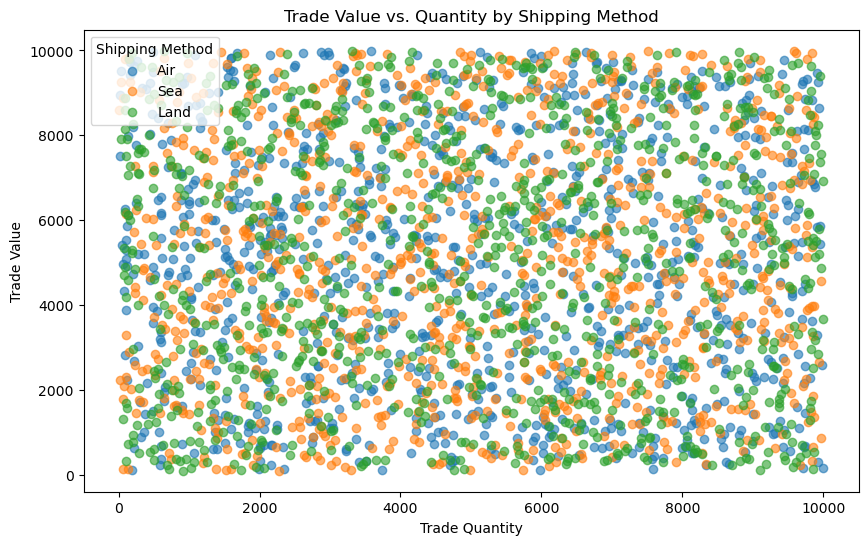

In [35]:
# Scatter Plot for Trade Value vs. Quantity by Shipping Method
plt.figure(figsize=(10, 6))

# Subset the data by shipping method
shipping_methods = random_df['Shipping_Method'].unique()

for method in shipping_methods:
    subset = random_df[random_df['Shipping_Method'] == method]
    plt.scatter(subset['Quantity'], subset['Value'], label=method, alpha=0.6)

plt.title('Trade Value vs. Quantity by Shipping Method')
plt.xlabel('Trade Quantity')
plt.ylabel('Trade Value')
plt.legend(title="Shipping Method")
plt.show()


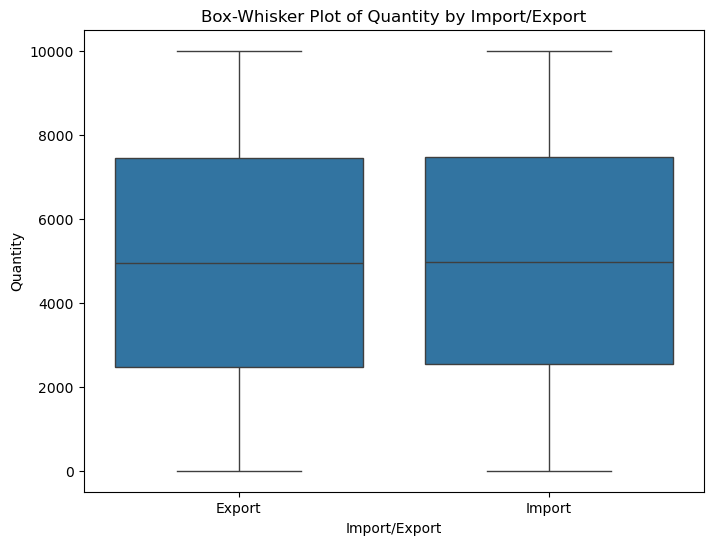

In [36]:
import seaborn as sns

# Box-Whisker plot for Quantity by some categorical variable (e.g., Import_Export)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Import_Export', y='Quantity', data=df)
plt.title('Box-Whisker Plot of Quantity by Import/Export')
plt.xlabel('Import/Export')
plt.ylabel('Quantity')
plt.show()

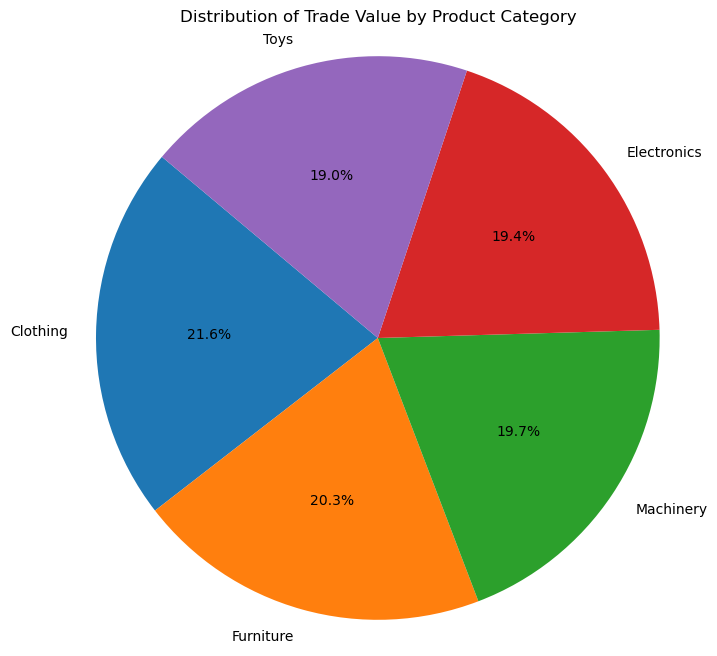

In [37]:
# Group by product categories and sum the trade values
product_categories = random_df.groupby('Category').agg({
    'Value': 'sum'
}).sort_values(by='Value', ascending=False)

# Pie chart for Product Categories by Trade Value
plt.figure(figsize=(8, 8))
plt.pie(product_categories['Value'], labels=product_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Trade Value by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [38]:
import scipy.stats as stats

# Example: Observed and expected frequencies
observed = df['Category'].value_counts().values  # Replace with your categorical column
expected = [len(df) / len(observed)] * len(observed)  # Uniform expected frequencies

# Perform Chi-square goodness of fit test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")

Chi-Square Statistic: 4.676666666666667, P-value: 0.3221101687806341


In [39]:
# Mann-Whitney U Test (for comparing two independent groups in a non-categorical column)
for col in non_categorical_columns:
    for cat_col in categorical_columns:
        unique_groups = random_df[cat_col].dropna().unique()
        if len(unique_groups) == 2:
            group1 = random_df[random_df[cat_col] == unique_groups[0]][col].dropna()
            group2 = random_df[random_df[cat_col] == unique_groups[1]][col].dropna()
            stat, p_val = mannwhitneyu(group1, group2)
            print(f"Mann-Whitney U Test for {col} by {cat_col} - Statistic: {stat}, p-value: {p_val}")

Mann-Whitney U Test for Quantity by Import_Export - Statistic: 1143363.0, p-value: 0.4549370483145987
Mann-Whitney U Test for Value by Import_Export - Statistic: 1094455.0, p-value: 0.1889718779230094
Mann-Whitney U Test for Customs_Code by Import_Export - Statistic: 1151848.5, p-value: 0.26925911015290016
Mann-Whitney U Test for Weight by Import_Export - Statistic: 1115442.0, p-value: 0.6677198881642811
Mann-Whitney U Test for Invoice_Number by Import_Export - Statistic: 1128081.0, p-value: 0.9177575576147909


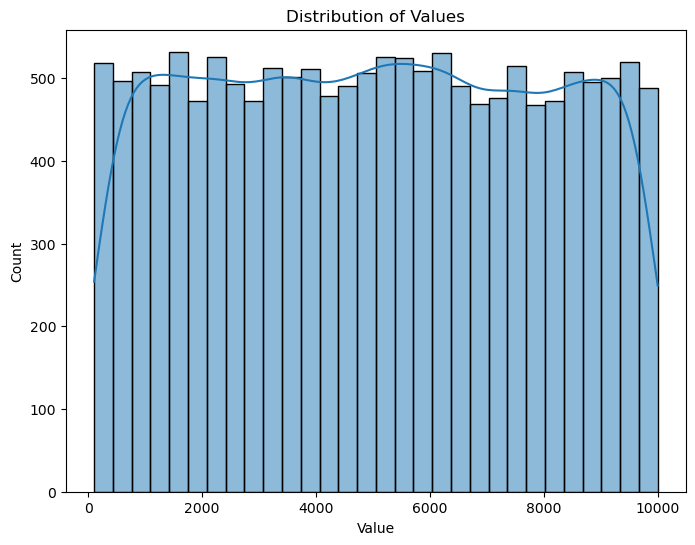

In [40]:
# Histogram of the 'Value' column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Value', bins=30, kde=True)
plt.title('Distribution of Values')
plt.show()

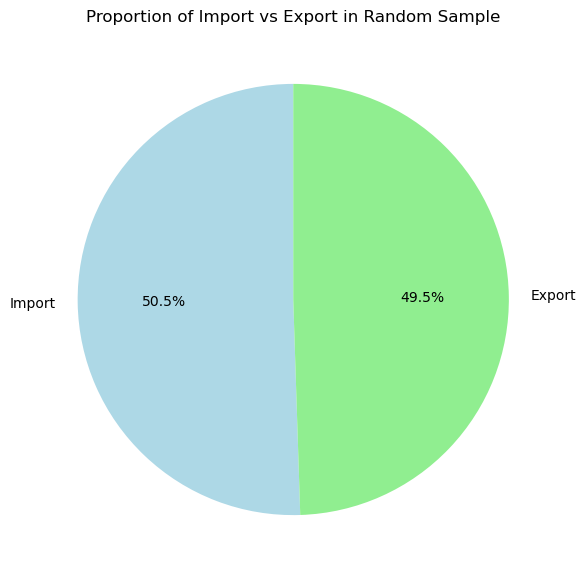

In [41]:
import matplotlib.pyplot as plt

# Select relevant categorical column 'Import_Export' to make a pie chart
import_export_counts = random_df['Import_Export'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(import_export_counts, labels=import_export_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Import vs Export in Random Sample')
plt.show()

In [42]:
pip install streamlit pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# **Observations | Findings**

a)	Higher-value transactions tend to be associated with products in certain categories such as clothing.

b)	Export transactions show a greater variance in value and weight compared to imports.

c)	Certain countries like Cambodia and Northern Mariana Islands have high transaction counts, indicating strong trade relations.

d)	Air shipping appears to be more common for lighter and higher-value goods, while sea shipping is associated with heavier goods.
.


# **Managerial Insights | Recommendations**

1.	Optimizing Shipping Methods:

	Leverage air freight for high-value, lightweight goods, and use sea freight for heavier, lower-value goods to minimize shipping costs and maximize       efficiency.

2.	Focus on High-Value Categories:
                                                                               
	Prioritize partnerships with countries or industries that consistently generate high trade values, such as clothing exports.

3.	Customs Process Improvement:
                                                                               
	Streamline customs documentation processes, particularly in countries where customs code variance is high, to reduce delays and improve transaction      transparency.
4.	Strategic Expansion:

	Expand trade partnerships with countries like Cambodia that exhibit strong trade relationships and consistent transaction volumes.
